In [1]:
import sys
sys.path.append('..')
  
# importing
from agents.PG_Agent import PG_Agent
from helpers.plot_util import *

In [2]:
agent = PG_Agent(  
                env_name="LunarLander-v2",
                 ALPHA= 0.001,
                 GAMMA=0.99,
                 layer1_size=128,  
                 layer2_size=64,
                 sol_th=200,
                 reproduce_seed=None)
#checks
#1-->30*30(0.98 and 0.01 without R normalization) with avg_rw=150 --> done --> bad results
#2-->64*64(0.98 and 0.0001 without R normalization) with avg_rw=150 --> done --> seems good results --> work on it #3
#3-->Note # incase of Lunar Lander try to train the agents cases just for epusodes where eps_steps < 999

################################################################################
#4-->Best setting so far 128*64 , 0.99 , 0.001 . episode taken = 1196 sol_th =120 , try for aw-rw=130
#5-->Best setting so far 128*64 , 0.99 , 0.001 . episode taken = 1196 sol_th =200 
#################################################################################




Ep: 8050 , Ep_Steps: 714 , Ep_Reward : 234.69 , Avg_Reward : 200.04 , Loss: 0.0204
Mean Reward over last 100 ep more than 200
Model saved


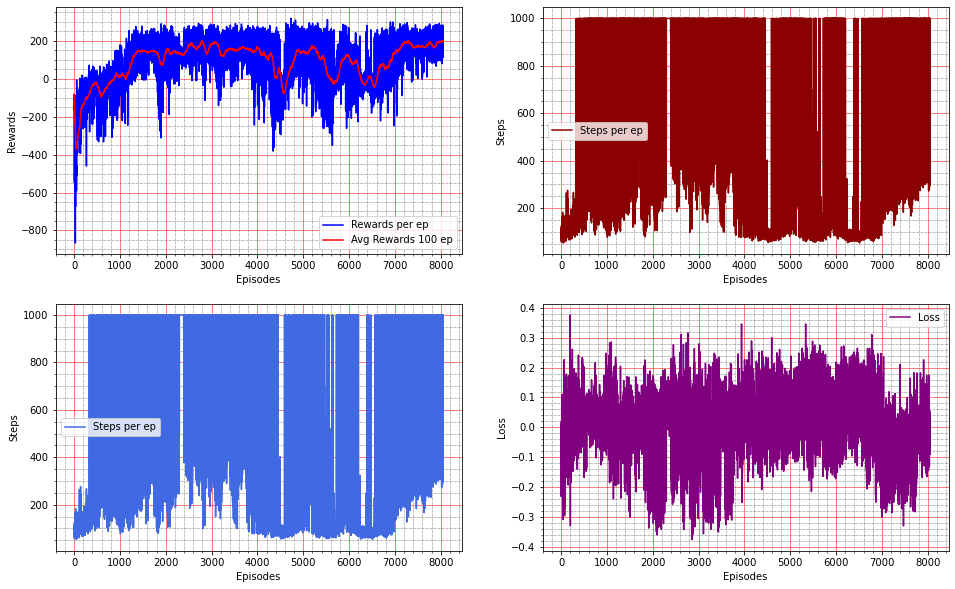

In [3]:
agent.train_multiple_episodes(num_episodes=20000)    
model,book_keeping=agent.get_trained_model_info()
PG_learning_plot(book_keeping)

pyvirtualdisplay successfully imported
Tests # 42 , Rewards 246.46461192170324 , Steps 456
Tests # 900 , Rewards 217.70054725788196 , Steps 498
Tests # 930 , Rewards 227.5691380031765 , Steps 387
Tests # 180 , Rewards 210.4137688217069 , Steps 402
Tests # 660 , Rewards 106.92772638629017 , Steps 1000
Tests # 240 , Rewards 199.64736151982055 , Steps 369
Tests # 960 , Rewards 263.8955869883413 , Steps 489
Tests # 450 , Rewards 254.62578631195774 , Steps 401
Tests # 30 , Rewards 111.98040042385644 , Steps 1000
Tests # 90 , Rewards 211.75360229057685 , Steps 365
Tests # 150 , Rewards 158.8278570341877 , Steps 1000
Tests # 210 , Rewards 101.82847124992406 , Steps 1000
Tests # 330 , Rewards 246.42388110351996 , Steps 421
Tests # 420 , Rewards 190.3681206648308 , Steps 419
Tests # 510 , Rewards 241.39320081543704 , Steps 401
Tests # 75 , Rewards 270.89598719713433 , Steps 360


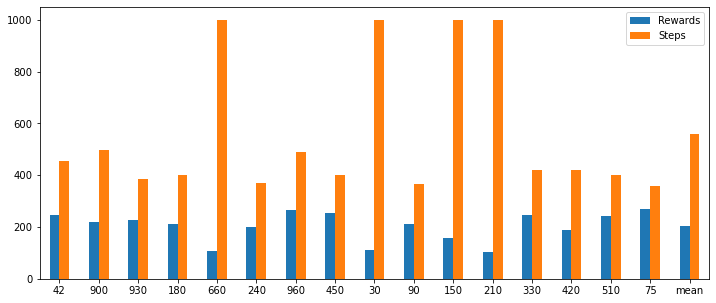

In [4]:
if agent.trained:
    test_cases_data,image_paths =agent.run_test_instances(case_list=[42,900,930,180,660,240,960,450,30,90,150,210,330,420,510,75], model_=model)
    # Plot Test cases data
    plot_test_cases(test_cases_data)

In [5]:
import IPython.display as display
import ipywidgets as widgets
from ipywidgets import GridspecLayout

x=len(test_cases_data)//4
y=len(test_cases_data)//4
grid = GridspecLayout(x, y)

for i in range(x):
    for j in range(y):
        img=open(image_paths[4*i+j],'rb').read()
        grid[i, j] = widgets.Image(value=img, format='gif', width=220, height=510)

grid

GridspecLayout(children=(Image(value=b'GIF89aX\x02\x90\x01\x83\x00\x00\x00\x00\x00\xcc\xcc\x0033ff3f3fffff33\x…